<a href="https://colab.research.google.com/github/nedokormysh/Stepik_AI_Education_Linear_algorithms/blob/week_1/AI_edu_LA_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/cars_prices.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# 1_2 Сколько строк в таблице?

In [90]:
df.shape

(205, 26)

# 1_3 В скольких столбцах таблицы есть пропущенные значения?

Пропуски в датасете обозначаются знаком вопроса (?)

In [91]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [83]:
# df['normalized-losses'].value_counts()

In [95]:
# df.isin(['?']).sum()

In [96]:
df = df.replace('?', np.nan)

In [97]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# 1_4 Сколько различных категорий в столбце num-of-doors?
(категорию с пропусками не считайте)

In [98]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

# 1_5 На какое распределение больше похоже распределение price?

Удалите из таблицы строки, где price неизвестна. Дальше в заданиях работайте с измененной таблицей (после удаления строк в этом задании). Постройте гистограмму распределения столбца price.

In [99]:
df = df[~df['price'].isna()]

<Axes: >

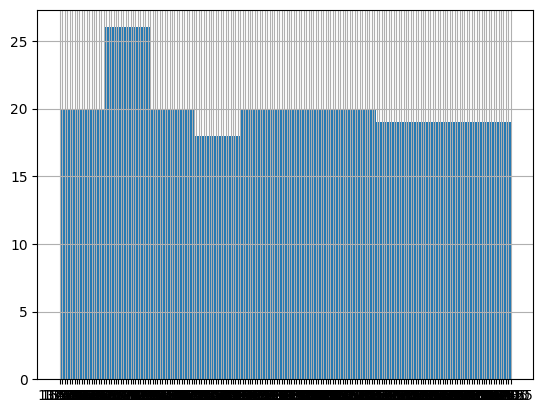

In [100]:
df['price'].hist()

# 1_6 Чему равно среднее значение в столбце city-mpg?
Ответ округлите до сотых.

In [101]:
df['price'].isna().sum()

0

In [103]:
round(df['city-mpg'].mean(), 2)

25.18

# 1_7 Чему равно медианное значение highway-mpg для машин audi?  (make == 'audi')

Ответ округлите до целого числа.

In [104]:
df[df['make']=='audi']['highway-mpg'].median()

25.0

# 1_8 Вычислите коэффициент корреляции между city-mpg и highway-mpg.
Ответ округлите до сотых.

In [110]:
np.corrcoef(df['city-mpg'], df['highway-mpg'])[0][1]

0.9720437058960109

In [107]:
df['city-mpg'].corr(df['highway-mpg'])

0.9720437058960109

# 1_9 Какая самая дорогая марка автомобилей?

Ответьте на вопрос, выбрав самую популярную марку среди трех самых дорогих автомобилей.

In [116]:
df.groupby('make').agg(price_max=('price', 'max'), count=('make', 'count')).sort_values(by='price_max')

,price_max,count
make,,
alfa-romero,16500,3
mercury,16503,1
peugot,18150,11
saab,18620,6
volvo,22625,11
audi,23875,6
jaguar,36000,3
porsche,37028,4
bmw,41315,8


# 1_10
Среди всех автомобилей, работающих на дизеле (fuel-type == 'diesel') в таблице, сколько представлено различных марок (make)?

In [121]:
df[df['fuel-type']== 'diesel']['make'].nunique()

7

# 1_11  Найдите 80%-квантиль столбца wheel-base.
Ответ введите без округлений.

In [124]:
df['wheel-base'].quantile(0.8)

103.5